<a href="https://colab.research.google.com/github/brunodeoli/dio-baires-metricas-avaliacao/blob/main/dio_baires_metricas_avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8933 - loss: 0.3400 - val_accuracy: 0.9857 - val_loss: 0.0446
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9844 - loss: 0.0510 - val_accuracy: 0.9894 - val_loss: 0.0355
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9902 - loss: 0.0313 - val_accuracy: 0.9924 - val_loss: 0.0282


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


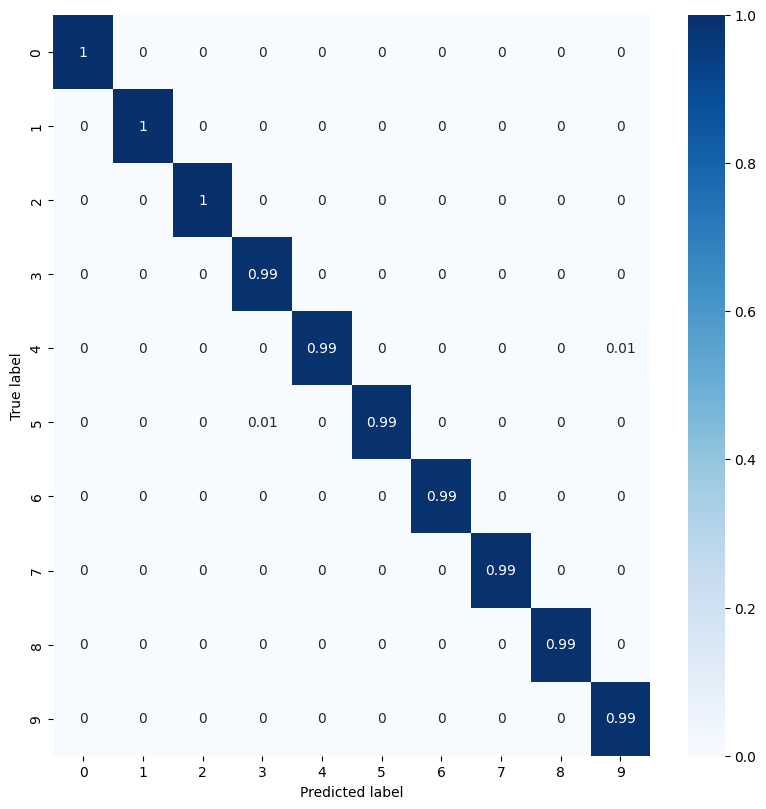

In [9]:
y_true = test_labels
y_pred = model.predict(test_images)

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred.argmax(axis=1)).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
def get_metrics(con_mat):

  TP, TN, FP, FN = 0, 0, 0, 0

  num_classes = con_mat.shape[0]

  for i in range(num_classes):
    for j in range(num_classes):
      if i == j:
        TP += con_mat[i, j]
      else:
        FN += con_mat[i, j]
        FP += con_mat[j,i]

  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)
  accuracy = (TP + TN) / (TP+FP+TN+FN)
  precision = TP / (TP + FP)
  f_score = 2 * (precision * sensitivity) / (precision + sensitivity)


  return {
      "sensitivity": sensitivity,
      "specificity": specificity,
      "accuracy": accuracy,
      "precision": precision,
      "f_score": f_score,
  }

In [12]:
metrics = get_metrics(con_mat)

for metric, value in metrics.items():
  print(f"{metric}: {value}")

sensitivity: 0.9924
specificity: 0.0
accuracy: 0.9849146486701071
precision: 0.9924
f_score: 0.9924
